In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [11]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
log = pd.read_csv('TwitterDev.csv')

In [9]:
API=log['Value'][0]
API_Sec = log['Value'][1]
Bear_token = log['Value'][2]
accessToken = log['Value'][3]
accessTokenSecret = log['Value'][4]

In [12]:
authenticate = tweepy.OAuthHandler(API,API_Sec)

In [13]:
authenticate.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [18]:
posts = api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

i = 1
for t in posts[0:5]:
    print(str(i)+'.'+t.full_text+'\n')
    i=i+1

1.Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced @jimmyfallon to drink it too). Was it worth it? You bet. Here’s why: https://t.co/8SJbCuNezD

2.RT @MSuzman: We take one step closer to a malaria-free world with this exciting new project that seeks to develop an mRNA-based malaria vac…

3.I’ve been rewatching some of my favorite movies. Add your favorites to the list on @Likewise. https://t.co/bEgD4aMmSU

4.Getting an early start on my weekend reading: this article does a good job explaining immunity and what may happen with COVID-19 in the future. https://t.co/AHatTlUdOr

5.During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job. https://t.co/oAzGsIGSUN #endpolio



In [20]:
#Create A pandas dataframe with column called tweets
df = pd.DataFrame([t.full_text for t in posts],columns=['Tweets'])

df.head()

,Tweets
0,"Over the years, I’ve shared a stage with a jar..."
1,RT @MSuzman: We take one step closer to a mala...
2,I’ve been rewatching some of my favorite movie...
3,Getting an early start on my weekend reading: ...
4,"During the height of the U.S. polio epidemic, ..."


In [39]:
# Text cleaning

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # removes @ mentions
    text = re.sub(r'#','',text) # removes # symbol
    text = re.sub(r'RT[\s]+','',text) # removing Retweets
    text = re.sub(r'https?:\/\/\S+','',text) # remove hyperlinks
    return text

df['Tweets']=df['Tweets'].apply(cleanText)

df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Over the years, I’ve shared a stage with a jar...",0.400000,-0.066667,Negative
1,: We take one step closer to a malaria-free wo...,0.627273,0.218182,Positive
2,I’ve been rewatching some of my favorite movie...,1.000000,0.500000,Positive
3,Getting an early start on my weekend reading: ...,0.341667,0.266667,Positive
4,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive


In [27]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Two new columns for subjectivity and polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"Over the years, I’ve shared a stage with a jar...",0.400000,-0.066667
1,: We take one step closer to a malaria-free wo...,0.627273,0.218182
2,I’ve been rewatching some of my favorite movie...,1.000000,0.500000
3,Getting an early start on my weekend reading: ...,0.341667,0.266667
4,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000
...,...,...,...
95,Meaningful action from business leaders will r...,0.366667,0.366667
96,"Thanks to , , and everyone who joined our virt...",0.537500,0.400000
97,Great to see this important step as the United...,0.437500,0.300000
98,Thanks to for hosting the launch of my virtua...,0.487500,0.475000


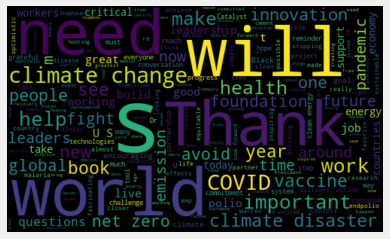

In [28]:
# Plot Word Cloud 
allWords = ' '.join([t for t in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
# Function to compute negative, neutral and positive sentiments

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df
    

,Tweets,Subjectivity,Polarity,Analysis
0,"Over the years, I’ve shared a stage with a jar...",0.400000,-0.066667,Negative
1,: We take one step closer to a malaria-free wo...,0.627273,0.218182,Positive
2,I’ve been rewatching some of my favorite movie...,1.000000,0.500000,Positive
3,Getting an early start on my weekend reading: ...,0.341667,0.266667,Positive
4,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive
...,...,...,...,...
95,Meaningful action from business leaders will r...,0.366667,0.366667,Positive
96,"Thanks to , , and everyone who joined our virt...",0.537500,0.400000,Positive
97,Great to see this important step as the United...,0.437500,0.300000,Positive
98,Thanks to for hosting the launch of my virtua...,0.487500,0.475000,Positive


In [35]:
# Print all neutral tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0,sortedDf.shape[0]):
    if (sortedDf['Analysis'][i]=='Neutral'):
        print(str(j)+'. '+sortedDf['Tweets'][i]+'\n')
        j = j+1
        
    

1. : How can we:
💨 Boost greentech growth?
🔽 Lower costs?
🪙 Help commercialise sustainable projects faster?

President Hoyer met with…

2. : Support for polio eradication will not only help wipe out a disease, it will prepare countries against future health t…

3. COVID-19 has highlighted how digital tools can save lives. I’m encouraged by  research highlighting how technologies in Nigeria, Sri Lanka, Burkina Faso, Uganda, South Africa, and Vietnam can be scaled to detect and respond to pandemics. 

4. The persistence of countless Rotarians gives me hope that we can achieve a polio-free world. As they close the Rotary21 Convention, I'd like to thank  for the continued partnership to endpolio. 

5. : In honor of 20 years of  impact, see how heroes from around the world came together, refused to accept the statu…

6. This partnership between  Energy and the _Commission will create jobs around the world, build sustainable global industries, and expand opportunity for billions:  Thank you 

In [36]:
# Print all Negative tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0,sortedDf.shape[0]):
    if (sortedDf['Analysis'][i]=='Negative'):
        print(str(j)+'. '+sortedDf['Tweets'][i]+'\n')
        j = j+1
        
    

1. Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced  to drink it too). Was it worth it? You bet. Here’s why: 

2. Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

3. Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

4. It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

5. : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

6. For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life i

In [40]:
# Print all Positive tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0,sortedDf.shape[0]):
    if (sortedDf['Analysis'][i]=='Positive'):
        print(str(j)+'. '+sortedDf['Tweets'][i]+'\n')
        j = j+1
        
    

1. : We take one step closer to a malaria-free world with this exciting new project that seeks to develop an mRNA-based malaria vac…

2. I’ve been rewatching some of my favorite movies. Add your favorites to the list on . 

3. Getting an early start on my weekend reading: this article does a good job explaining immunity and what may happen with COVID-19 in the future. 

4. During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job.  endpolio

5. : Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…

6. Our foundation joined the polio fight almost 15 years ago. And in all that time, I cannot think of a more important moment than right now. 

7. I look forward to working with you and _Commission on all of these important goals. Europe is a criti

Text(0, 0.5, 'Subjectivity')

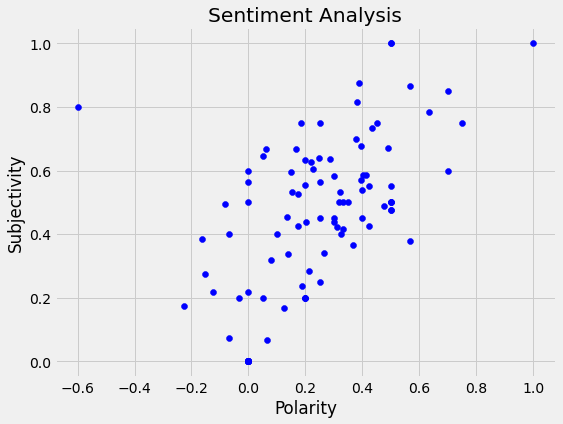

In [41]:
# Polarity vs Subjectivity Graph
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [50]:
# Get the percentage of Neutral, Negative and Positive Tweets
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']
neuper = round((neutweets.shape[0]/df.shape[0])*100,1)
print("Percentage of neutral tweets: "+str(neuper))
ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['Tweets']
nper = round((ntweets.shape[0]/df.shape[0])*100,1)
print("Percentage of Negative tweets: "+str(nper))
ptweets = df[df.Analysis=='Positive']
pper = round((ptweets.shape[0]/df.shape[0])*100,1)
print("Percentage of Positive tweets: "+str(pper))

Percentage of neutral tweets: 18.0
Percentage of Negative tweets: 9.0
Percentage of Positive tweets: 73.0


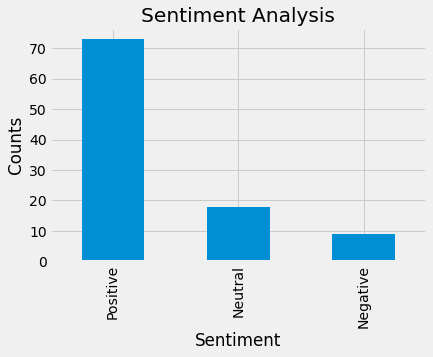

In [51]:
# Count plot of tweets
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()